<h1><center><font color=red>Homework1</font></center></h1>


- Apply Average Mask Filtering on an example image using 3x3, 5x5, and 7x7 mask sizes and plot the results
- Apply Two Non-linear Filtering operation on the same images with the same mask sizes above and plot the results.
- Try 0 Padding and compare the results with copying the border gray image and plot the results.
- Do not use the ready functions in Matlab or Python that make the filtering.


### Importing libraries

1. numpy
دي المكتبة المسئولة عن الحسابات الرقمية في بايثون

2. cv2
دي مكتبة مكتوبة بلغة سي بلس بلس لتحليل الصور وبنتعامل معاها من خلال بايثون

3. matplotlib.pyplot
دي المكتبة اللي بنرسم بيها لو عايزين نظهر صورة علي الشاشة

4. matplotlib.gridspec

دي دالة في مكتبة الرسومات بتخلينا نحط صور جمب بعضها في صورة واحده

5. import requests
6. from io import BytesIO

دول عشان نفتح صورة من النت مباشرة 

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.gray()

import requests
from io import BytesIO

### Read image

بنقري الصورة من علي النت علي هيئة ريكويست

In [2]:
# load img from url
url = 'https://i.pinimg.com/originals/bf/91/0d/bf910d059a2051fbfa151e63a10d879e.jpg'
response = requests.get(url)

# using cv2
arr = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'


الصورة اللي طلعت ممكن نظهرها كدا

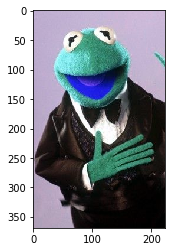

In [3]:
plt.imshow(img)

للتبسيط هنحولها للون واحد

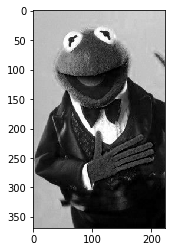

In [4]:
# change to gray level
img2 = img[:,:,0]
plt.imshow(img2)

# <font color=purple>Average filter with no builtin functions</font>

الخطوات 
1. هنعمل مصفوفة من الاصفار بنفس شكل المصفوفة بتاعة الصورة

2. هنلف علي مصفوفة الصورة كل صف وكل عمود وناخد النقط اللي حولية ونجيب المتوسط بتاعهم أو الوسيط أو القيم الصغري فيهم

- بنجيب شكل المصفوفة كدا 
دا معناه ان المصفوفة بتاعة الصورة فيها 369 صفوف و 224 أعمدة

In [5]:
img2.shape

(369, 224)

- range

دي دالة بتولد رقم من صفر لحد ماحنا عايزين

In [6]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


السطر ده كان معناه اننا بنطلع مصفوفة تلاته في تلاته من مصفوفة الصورة ونضربها في الماسك 
np.sum(img2[np.ix_([xp1,xp2,xp3],[yp1, yp2, yp3])] * img_ave)

بس طالما هدفنا متوسط ممكن نستغني علي الماسك ونعمل كدا 

In [7]:
# # mean
# np.mean(img2[np.ix_([xp1,xp2,xp3],[yp1, yp2, yp3])])
# # median
# np.median(img2[np.ix_([xp1,xp2,xp3],[yp1, yp2, yp3])])
# # min
# np.min(img2[np.ix_([xp1,xp2,xp3],[yp1, yp2, yp3])])

## 3x3 average filter

In [8]:
# create mask 
img_ave = np.ones(shape = (3,3))* 1/9

# create array of zeros similar to the original array
img3by3 = np.zeros(shape = ((img2.shape[0] - 2),(img2.shape[1] - 2)))
for j in range(1, img2.shape[0] - 1):
    xp1 = j - 1 
    xp2 = j
    xp3 = j + 1
    for i in range(1,img2.shape[1] - 1):
        yp1 = i - 1
        yp2 = i 
        yp3 = i + 1
        # update the values of the new array
        img3by3[xp1 , yp1] = np.sum(img2[np.ix_([xp1,xp2,xp3],[yp1, yp2, yp3])] * img_ave)


## 5x5 average filter

In [9]:
img_ave = np.ones(shape = (5,5))* 1/25
img5by5 = np.zeros(shape = ((img2.shape[0] - 4),(img2.shape[1] - 4)))
for j in range(2, img2.shape[0] - 2):
    xp1 = j - 2 
    xp2 = j - 1
    xp3 = j 
    xp4 = j + 1
    xp5 = j + 2
    for i in range(2,img2.shape[1] - 2):
        yp1 = i - 2
        yp2 = i - 1
        yp3 = i 
        yp4 = i + 1
        yp5 = i + 2
        
        img5by5[xp1 , yp1] = np.sum(img2[np.ix_([xp1,xp2,xp3,xp4, xp5],[yp1, yp2, yp3,yp4,yp5])] * img_ave)


## 7x7 average filter

In [10]:
img_ave = np.ones(shape = (7,7))* 1/49
img7by7 = np.zeros(shape = ((img2.shape[0] - 6),(img2.shape[1] - 6)))
for j in range(3, img2.shape[0] - 3):
    xp1 = j - 3 
    xp2 = j - 2
    xp3 = j - 1
    xp4 = j 
    xp5 = j + 1
    xp6 = j + 2
    xp7 = j + 3
    for i in range(3,img2.shape[1] - 3):
        yp1 = i - 3
        yp2 = i - 2
        yp3 = i - 1
        yp4 = i 
        yp5 = i + 1
        yp6 = i + 2
        yp7 = i + 3
        
        img7by7[xp1 , yp1] = np.sum(img2[np.ix_([xp1,xp2,xp3,xp4, xp5, xp6,xp7],[yp1, yp2, yp3,yp4,yp5,yp6,yp7])] * img_ave)


### Plotting three linear filters

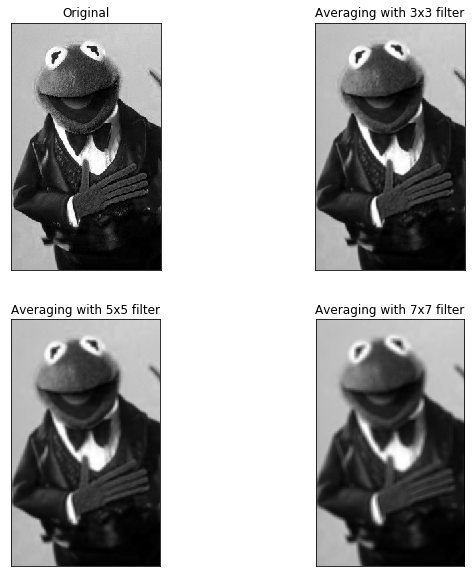

In [11]:
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(10,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.imshow(img2),plt.title('Original')
plt.xticks([]), plt.yticks([])
ax = plt.subplot(gs[0, 1]) # row 0, col 0
plt.imshow(img3by3),plt.title('Averaging with 3x3 filter')
plt.xticks([]), plt.yticks([])
ax = plt.subplot(gs[1, 0]) # row 0, col 0
plt.imshow(img5by5),plt.title('Averaging with 5x5 filter')
plt.xticks([]), plt.yticks([])
ax = plt.subplot(gs[1, 1]) # row 0, col 0
plt.imshow(img7by7),plt.title('Averaging with 7x7 filter')
plt.xticks([]), plt.yticks([])
plt.show()

# <font color=purple> Non linear filters </font>

## 1. Median filter

### 3x3 filter

In [12]:
img3by3 = np.zeros(shape = ((img2.shape[0] - 2),(img2.shape[1] - 2)))
for j in range(1, img2.shape[0] - 1):
    xp1 = j - 1 
    xp2 = j
    xp3 = j + 1
    for i in range(1,img2.shape[1] - 1):
        yp1 = i - 1
        yp2 = i 
        yp3 = i + 1
        img3by3[xp1 , yp1] = np.median(img2[np.ix_([xp1,xp2,xp3],[yp1, yp2, yp3])])


### 5x5 filter

In [13]:
img5by5 = np.zeros(shape = ((img2.shape[0] - 4),(img2.shape[1] - 4)))
for j in range(2, img2.shape[0] - 2):
    xp1 = j - 2 
    xp2 = j - 1
    xp3 = j 
    xp4 = j + 1
    xp5 = j + 2
    for i in range(2,img2.shape[1] - 2):
        yp1 = i - 2
        yp2 = i - 1
        yp3 = i 
        yp4 = i + 1
        yp5 = i + 2
        
        img5by5[xp1 , yp1] = np.median(img2[np.ix_([xp1,xp2,xp3,xp4, xp5],[yp1, yp2, yp3,yp4,yp5])])


### 7x7 filter

In [14]:
img7by7 = np.zeros(shape = ((img2.shape[0] - 6),(img2.shape[1] - 6)))
for j in range(3, img2.shape[0] - 3):
    xp1 = j - 3 
    xp2 = j - 2
    xp3 = j - 1
    xp4 = j 
    xp5 = j + 1
    xp6 = j + 2
    xp7 = j + 3
    for i in range(3,img2.shape[1] - 3):
        yp1 = i - 3
        yp2 = i - 2
        yp3 = i - 1
        yp4 = i 
        yp5 = i + 1
        yp6 = i + 2
        yp7 = i + 3
        
        img7by7[xp1 , yp1] = np.median(img2[np.ix_([xp1,xp2,xp3,xp4, xp5, xp6,xp7],[yp1, yp2, yp3,yp4,yp5,yp6,yp7])])


### Plotting median filters

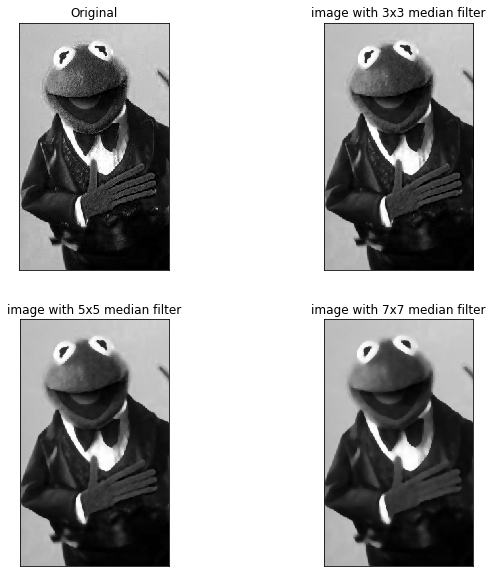

In [15]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(10,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.imshow(img2),plt.title('Original')
plt.xticks([]), plt.yticks([])
ax = plt.subplot(gs[0, 1]) # row 0, col 0
plt.imshow(img3by3),plt.title('image with 3x3 median filter')
plt.xticks([]), plt.yticks([])
ax = plt.subplot(gs[1, 0]) # row 0, col 0
plt.imshow(img5by5),plt.title('image with 5x5 median filter')
plt.xticks([]), plt.yticks([])
ax = plt.subplot(gs[1, 1]) # row 0, col 0
plt.imshow(img7by7),plt.title('image with 7x7 median filter')
plt.xticks([]), plt.yticks([])
plt.show()

## 2. Min filter


### 3x3 filter

In [16]:
img3by3 = np.zeros(shape = ((img2.shape[0] - 2),(img2.shape[1] - 2)))
for j in range(1, img2.shape[0] - 1):
    xp1 = j - 1 
    xp2 = j
    xp3 = j + 1
    for i in range(1,img2.shape[1] - 1):
        yp1 = i - 1
        yp2 = i 
        yp3 = i + 1
        img3by3[xp1 , yp1] = np.min(img2[np.ix_([xp1,xp2,xp3],[yp1, yp2, yp3])])


### 5x5 filter

In [17]:
img5by5 = np.zeros(shape = ((img2.shape[0] - 4),(img2.shape[1] - 4)))
for j in range(2, img2.shape[0] - 2):
    xp1 = j - 2 
    xp2 = j - 1
    xp3 = j 
    xp4 = j + 1
    xp5 = j + 2
    for i in range(2,img2.shape[1] - 2):
        yp1 = i - 2
        yp2 = i - 1
        yp3 = i 
        yp4 = i + 1
        yp5 = i + 2
        
        img5by5[xp1 , yp1] = np.min(img2[np.ix_([xp1,xp2,xp3,xp4, xp5],[yp1, yp2, yp3,yp4,yp5])])


In [18]:
img7by7 = np.zeros(shape = ((img2.shape[0] - 6),(img2.shape[1] - 6)))
for j in range(3, img2.shape[0] - 3):
    xp1 = j - 3 
    xp2 = j - 2
    xp3 = j - 1
    xp4 = j 
    xp5 = j + 1
    xp6 = j + 2
    xp7 = j + 3
    for i in range(3,img2.shape[1] - 3):
        yp1 = i - 3
        yp2 = i - 2
        yp3 = i - 1
        yp4 = i 
        yp5 = i + 1
        yp6 = i + 2
        yp7 = i + 3
        
        img7by7[xp1 , yp1] = np.min(img2[np.ix_([xp1,xp2,xp3,xp4, xp5, xp6,xp7],[yp1, yp2, yp3,yp4,yp5,yp6,yp7])])


### Plotting min filters

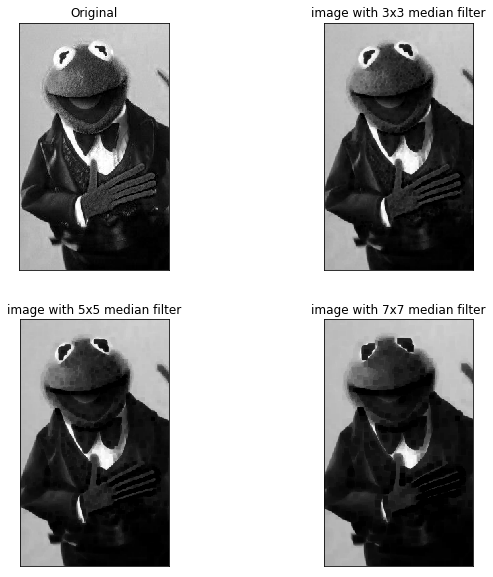

In [19]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(10,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.imshow(img2),plt.title('Original')
plt.xticks([]), plt.yticks([])
ax = plt.subplot(gs[0, 1]) # row 0, col 0
plt.imshow(img3by3),plt.title('image with 3x3 median filter')
plt.xticks([]), plt.yticks([])
ax = plt.subplot(gs[1, 0]) # row 0, col 0
plt.imshow(img5by5),plt.title('image with 5x5 median filter')
plt.xticks([]), plt.yticks([])
ax = plt.subplot(gs[1, 1]) # row 0, col 0
plt.imshow(img7by7),plt.title('image with 7x7 median filter')
plt.xticks([]), plt.yticks([])
plt.show()

# <font color=purple> Try 0 Padding and compare the results with copying the border gray image and plot the results.</font>


## Zero padding

In [20]:
img2withZeroPadding = np.zeros(shape = (img2.shape[0] + 2, img2.shape[1] + 2))
img2withZeroPadding[1:-1, 1:-1] = img2

In [21]:
img_ave = np.ones(shape = (3,3))* 1/9
img3by3_zeroPadding = np.zeros(shape = ((img2withZeroPadding.shape[0] - 2),(img2withZeroPadding.shape[1] - 2)))
for j in range(1, img2withZeroPadding.shape[0] - 1):
    xp1 = j - 1 
    xp2 = j
    xp3 = j + 1
    for i in range(1,img2withZeroPadding.shape[1] - 1):
        yp1 = i - 1
        yp2 = i 
        yp3 = i + 1
        img3by3_zeroPadding[xp1 , yp1] = np.sum(img2withZeroPadding[np.ix_([xp1,xp2,xp3],[yp1, yp2, yp3])] * img_ave)


In [22]:
img3by3.shape, img2.shape

((367, 222), (369, 224))

### use grey level of border pixels

In [23]:
img2filledborder = img2withZeroPadding.copy()

# filling the borders

img2filledborder[0,:] = img2filledborder[1,:]
img2filledborder[-1,:] = img2filledborder[-2,:]

img2filledborder[:,0] = img2filledborder[:,1]
img2filledborder[:,-1] = img2filledborder[:,-2]

img2filledborder[0,:] = img2filledborder[1,:]
img2filledborder[-1,:] = img2filledborder[-2,:]


In [24]:
img_ave = np.ones(shape = (3,3))* 1/9
img3by3_filledborders = np.zeros(shape = ((img2withZeroPadding.shape[0] - 2),(img2withZeroPadding.shape[1] - 2)))
for j in range(1, img2withZeroPadding.shape[0] - 1):
    xp1 = j - 1 
    xp2 = j
    xp3 = j + 1
    for i in range(1,img2withZeroPadding.shape[1] - 1):
        yp1 = i - 1
        yp2 = i 
        yp3 = i + 1
        img3by3_filledborders[xp1 , yp1] = np.sum(img2withZeroPadding[np.ix_([xp1,xp2,xp3],[yp1, yp2, yp3])] * img_ave)


### plotting the comparison

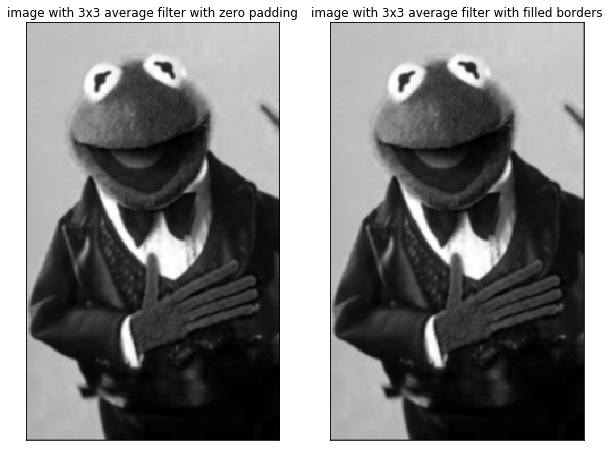

In [25]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(10,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.imshow(img3by3_zeroPadding),plt.title('image with 3x3 average filter with zero padding')
plt.xticks([]), plt.yticks([])
ax = plt.subplot(gs[0, 1]) # row 0, col 0
plt.imshow(img3by3_filledborders),plt.title('image with 3x3 average filter with filled borders')
plt.xticks([]), plt.yticks([])
plt.show()